In [35]:
##This script is to clean log data and perform EDA on 5 curves to predict a target log.

In [190]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics 
from sklearn.preprocessing import StandardScaler 
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

%matplotlib inline

In [191]:
#import csv
logs=pd.read_csv('logs_edt.csv')

In [192]:
#view data
logs.head()

,Observation_Num,UWI_PROXY,depth,curve1,curve2,curve3,curve4,curve5,target_log
0,1,uwi1,7500.0,68.713,0.107,2.021,0.361,2.594,91.291
1,2,uwi1,7500.5,69.613,0.158,2.007,0.355,2.579,88.889
2,3,uwi1,7501.0,70.963,0.150,2.007,0.350,2.592,70.571
3,4,uwi1,7501.5,72.312,0.150,2.000,0.349,2.592,50.000
4,5,uwi1,7502.0,73.437,0.075,1.993,0.350,2.563,57.658


In [193]:
#view data types
logs.dtypes

Observation_Num      int64
UWI_PROXY           object
depth              float64
curve1             float64
curve2             float64
curve3             float64
curve4             float64
curve5             float64
target_log         float64
dtype: object

In [194]:
#Find Nulls
logs.isnull().sum()

Observation_Num         0
UWI_PROXY               0
depth                   0
curve1             103629
curve2             152328
curve3              71311
curve4             327571
curve5             352175
target_log         246666
dtype: int64

In [195]:
#Remove Nulls
logs.dropna(inplace=True)
#logs.isnull().sum()

In [196]:
logs.shape

(540784, 9)

In [197]:
#remove poor hole quality
logs=logs.drop(logs[(logs.curve2 >0.2) | (logs.curve2 < -0.2)].index)

In [198]:
#view column sumaries
logs.describe()

,Observation_Num,depth,curve1,curve2,curve3,curve4,curve5,target_log
count,4.357450e+05,435745.000000,435745.000000,435745.000000,435745.000000,435745.000000,435745.000000,435745.000000
mean,5.710187e+05,10701.220498,86.259732,0.028867,227.875973,0.121441,2.573268,82.971965
std,2.686333e+05,1873.933654,61.485762,0.047387,3862.208506,1.004727,8.202547,15.985578
min,1.000000e+00,7500.000000,-526.937000,-0.200000,-39.376000,-10.180000,-3781.880000,-27.986000
25%,3.728310e+05,9101.500000,61.110000,0.000000,1.584000,0.157000,2.482000,76.697000
50%,6.048560e+05,10624.000000,91.554000,0.006000,2.328000,0.245000,2.529000,85.362000
75%,7.762010e+05,12371.000000,109.782000,0.038000,4.973000,0.317000,2.580000,92.872000
max,1.048575e+06,14000.000000,760.636000,0.200000,205597.578000,5.338000,13.237000,279.491000


In [199]:
logs.shape

(435745, 9)

In [200]:
#create df with Standard deviations of curve 4 by uwi (or well)
UWI_C4_stdev=logs[['UWI_PROXY','curve4']].groupby('UWI_PROXY').std()
UWI_C4_stdev.columns=['stdev']
#create df with Range of curve 4 by uwi (or well)
UWI_C4_range=logs[['UWI_PROXY','curve4']].groupby('UWI_PROXY').apply(lambda x: x.max()-x.min())
UWI_C4_range.columns=['range']
#create new data frame with Std and Range by UWI
frames = [UWI_C4_range, UWI_C4_stdev]
UWI_Filter = pd.concat(frames,axis=1)
UWI_Filter.reset_index(inplace=True)
UWI_Filter.head()

,UWI_PROXY,range,stdev
0,uwi1,0.757,0.109643
1,uwi10,0.503,0.106627
2,uwi100,0.329,0.045801
3,uwi11,3.317,0.893802
4,uwi12,3.829,0.841321


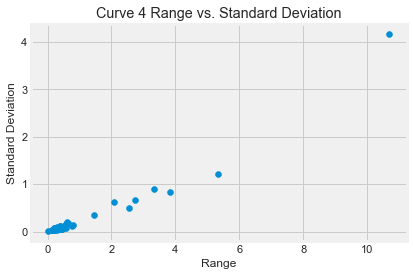

In [201]:
#Plot Range vs Standard deviation to look for erroneous logs (mnemonic problem)
plt.scatter(UWI_Filter['range'],UWI_Filter['stdev'])
plt.title('Curve 4 Range vs. Standard Deviation')
plt.xlabel('Range')
plt.ylabel('Standard Deviation')
plt.show()

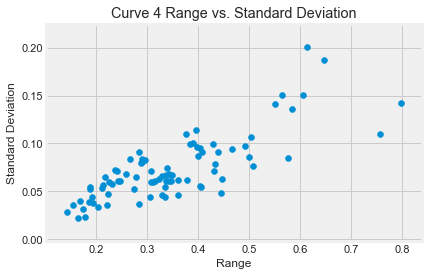

In [202]:
#Remove erroneous logs and replot the data
UWI_Filter=UWI_Filter.drop(UWI_Filter[(UWI_Filter.range > 1) | (UWI_Filter.range < 0.1)].index)
plt.scatter(UWI_Filter['range'],UWI_Filter['stdev'])
plt.title('Curve 4 Range vs. Standard Deviation')
plt.xlabel('Range')
plt.ylabel('Standard Deviation')
plt.show()

In [203]:
#Creat list with UWIs to keep in main DF
UWI_Keep=UWI_Filter['UWI_PROXY'].tolist()
#Creat new data frame with only those logs
logs_cln=logs[logs.UWI_PROXY.isin(UWI_Keep)]
#Check if that filter worked
logs_cln['UWI_PROXY'].unique()

array(['uwi1', 'uwi3', 'uwi4', 'uwi5', 'uwi7', 'uwi8', 'uwi9', 'uwi10',
       'uwi13', 'uwi14', 'uwi16', 'uwi17', 'uwi18', 'uwi21', 'uwi22',
       'uwi23', 'uwi24', 'uwi27', 'uwi28', 'uwi29', 'uwi30', 'uwi31',
       'uwi33', 'uwi34', 'uwi35', 'uwi36', 'uwi37', 'uwi38', 'uwi40',
       'uwi42', 'uwi43', 'uwi44', 'uwi45', 'uwi46', 'uwi48', 'uwi49',
       'uwi50', 'uwi51', 'uwi52', 'uwi53', 'uwi54', 'uwi57', 'uwi58',
       'uwi59', 'uwi60', 'uwi61', 'uwi62', 'uwi63', 'uwi64', 'uwi65',
       'uwi66', 'uwi67', 'uwi69', 'uwi70', 'uwi71', 'uwi72', 'uwi73',
       'uwi74', 'uwi75', 'uwi76', 'uwi77', 'uwi79', 'uwi80', 'uwi81',
       'uwi82', 'uwi83', 'uwi84', 'uwi85', 'uwi86', 'uwi87', 'uwi88',
       'uwi89', 'uwi90', 'uwi91', 'uwi92', 'uwi93', 'uwi94', 'uwi95',
       'uwi96', 'uwi97', 'uwi98', 'uwi99', 'uwi100'], dtype=object)

In [204]:
#Drop log values that are outside range of normal log responses
logs_cln2=logs_cln.drop(logs_cln[(logs_cln.curve1 < 0)|(logs_cln.curve1 > 600)|(logs_cln.curve3 <0.2)|(logs_cln.curve3 >2000)|(logs_cln.curve4 < -0.15)|(logs_cln.curve4 > 0.41)|(logs_cln.curve5 <1.95)|(logs_cln.curve5 >2.95)|(logs_cln.target_log <40)| (logs_cln.target_log >140)].index)

In [205]:
#View data relationship in cleaned data so far
logs_pair=logs_cln2[['curve1','curve2','curve3','curve4','curve5','target_log']]
#sns.pairplot(logs_pair)

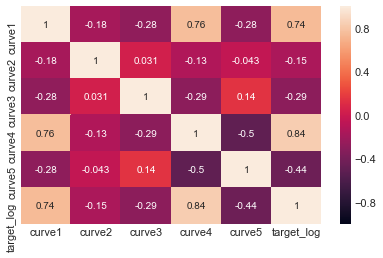

In [206]:
sns.heatmap(logs_pair.corr(),annot=True,vmin=-1, vmax=1)

In [207]:
#Create Masks to get rid of derivatives that aren't real
mask = logs_cln2.UWI_PROXY != logs_cln2.UWI_PROXY.shift(1)
mask2 = logs_cln2.UWI_PROXY != logs_cln2.UWI_PROXY.shift(2)
#Calculate the Derivative of Curve 1
logs_cln2['curve1_diff']=abs(logs_cln2['curve1'].diff().fillna(0))
logs_cln2['curve1_diff'][mask] = np.nan
#Calculate the Derivative of Curve 3
logs_cln2['curve3_diff']=abs(logs_cln2['curve3'].diff().fillna(0))
logs_cln2['curve3_diff'][mask] = np.nan
#Calculate the Derivative of Curve 4
logs_cln2['curve4_diff']=abs(logs_cln2['curve4'].diff().fillna(0))
logs_cln2['curve4_diff'][mask] = np.nan
#Calculate the Derivative of Curve 5
logs_cln2['curve5_diff']=abs(logs_cln2['curve5'].diff().fillna(0))
logs_cln2['curve5_diff'][mask] = np.nan
#Calculate the Derivative of Target Log
logs_cln2['Target_diff']=abs(logs_cln2['target_log'].diff().fillna(0))
logs_cln2['Target_diff'][mask] = np.nan
#Calculate the 2nd Derivative of Curve 1
logs_cln2['curve1_diff_2nd']=abs((logs_cln2['curve1'].diff()).diff().fillna(0))
logs_cln2['curve1_diff_2nd'][mask] = np.nan
logs_cln2['curve1_diff_2nd'][mask2] = np.nan
#Calculate the 2nd Derivative of Curve 3
logs_cln2['curve3_diff_2nd']=abs((logs_cln2['curve3'].diff()).diff().fillna(0))
logs_cln2['curve3_diff_2nd'][mask] = np.nan
logs_cln2['curve3_diff_2nd'][mask2] = np.nan
#Calculate the 2nd Derivative of Curve 4
logs_cln2['curve4_diff_2nd']=abs((logs_cln2['curve4'].diff()).diff().fillna(0))
logs_cln2['curve4_diff_2nd'][mask] = np.nan
logs_cln2['curve4_diff_2nd'][mask2] = np.nan
#Calculate the 2nd Derivative of Curve 5
logs_cln2['curve5_diff_2nd']=abs((logs_cln2['curve5'].diff()).diff().fillna(0))
logs_cln2['curve5_diff_2nd'][mask] = np.nan
logs_cln2['curve5_diff_2nd'][mask2] = np.nan
#Calculate the 2nd Derivative of Curve 5
logs_cln2['Target_diff_2nd']=abs((logs_cln2['target_log'].diff()).diff().fillna(0))
logs_cln2['Target_diff_2nd'][mask] = np.nan
logs_cln2['Target_diff_2nd'][mask2] = np.nan
#check if this worked
logs_cln2.isnull().sum()

C:\Users\mhurth\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mhurth\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\mhurth\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\mhurth\AppDat

Observation_Num      0
UWI_PROXY            0
depth                0
curve1               0
curve2               0
curve3               0
curve4               0
curve5               0
target_log           0
curve1_diff         81
curve3_diff         81
curve4_diff         81
curve5_diff         81
Target_diff         81
curve1_diff_2nd    162
curve3_diff_2nd    162
curve4_diff_2nd    162
curve5_diff_2nd    162
Target_diff_2nd    162
dtype: int64

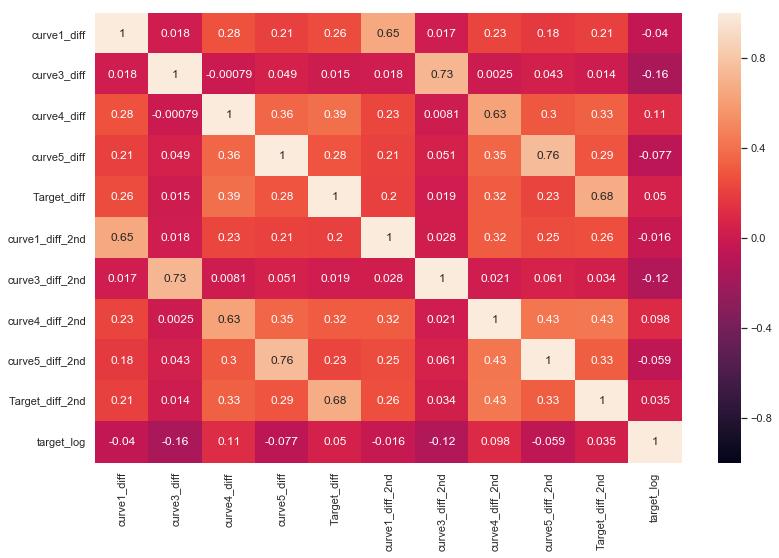

In [88]:
#View data relationship with differentials in cleaned data so far
logs_pair=logs_cln2[['curve1_diff','curve3_diff','curve4_diff','curve5_diff','Target_diff','curve1_diff_2nd','curve3_diff_2nd','curve4_diff_2nd','curve5_diff_2nd','Target_diff_2nd','target_log']]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(logs_pair.corr(),annot=True,vmin=-1, vmax=1)

In [210]:
#calculate the variance of the rolling windows of 2nd differential to identify cased hole or bad log
logs_cln2['Roll_curve1_diff_2nd']=logs_cln2['curve1_diff_2nd'].rolling(5,min_periods=3).var()
logs_cln2['Roll_curve3_diff_2nd']=logs_cln2['curve3_diff_2nd'].rolling(5,min_periods=3).var()
logs_cln2['Roll_curve4_diff_2nd']=logs_cln2['curve4_diff_2nd'].rolling(5,min_periods=3).var()
logs_cln2['Roll_curve5_diff_2nd']=logs_cln2['curve5_diff_2nd'].rolling(5,min_periods=3).var()
logs_cln2['Roll_Target_diff_2nd']=logs_cln2['Target_diff_2nd'].rolling(5,min_periods=3).var()
#check if this worked
logs_cln2[['UWI_PROXY','Roll_curve4_diff_2nd']].head(5)

,UWI_PROXY,Roll_curve4_diff_2nd
0,uwi1,NaN
1,uwi1,NaN
2,uwi1,NaN
3,uwi1,NaN
4,uwi1,0.000002


C:\Users\mhurth\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mhurth\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([6.135e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 6.027e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.100e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 9.574e+03,
        2.000e+00, 0.000e+00, 0.000e+00, 4.600e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.690e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        6.000e+00, 0.000e+00, 0.000e+00, 7.275e+03, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 5.391e+03, 1.000e+0

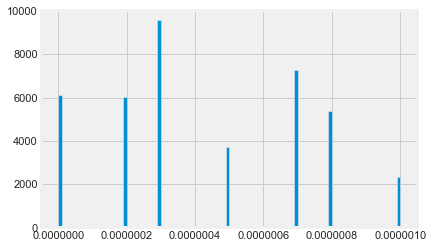

In [211]:
plt.hist(logs_cln2['Roll_curve4_diff_2nd'],bins=100,range=(0,.000001))

In [228]:
#drop collumns with no variance in 2nd derivative over 5' window
logs_cln3=logs_cln2.drop(logs_cln2[(logs_cln2.Roll_curve1_diff_2nd == 0)|(logs_cln2.Roll_curve3_diff_2nd == 0)|(logs_cln2.Roll_curve4_diff_2nd == 0)|(logs_cln2.Roll_curve5_diff_2nd == 0)|(logs_cln2.Roll_Target_diff_2nd == 0)].index)

In [229]:
print(logs_cln2.shape)
print(logs_cln3.shape)

(344440, 24)
(336903, 24)


In [230]:
#Insert Rolling window to denote areas where lithology is fluctuating rapidly (interbedded)
mask20 = logs_cln3.UWI_PROXY != logs_cln3.UWI_PROXY.shift(20)
logs_cln3['Roll20_curve1_diff_2nd']=logs_cln3['curve1_diff_2nd'].rolling(20,min_periods=20).var()
logs_cln3['Roll20_curve1_diff_2nd'][mask20]=np.nan
#Insert Rolling window of avg curve one to denote dominant rock type (card/mudstone/carbonacous mudstone)
logs_cln3['Roll20_curve1']=logs_cln3['curve1'].rolling(20,min_periods=20).var()
logs_cln3['Roll20_curve1'][mask20]=np.nan
#Insert natural log of curve 3
logs_cln3['Ln_curve3']=np.log(logs_cln3['curve3'])
logs_cln3[1800:2000]

C:\Users\mhurth\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\mhurth\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Observation_Num,UWI_PROXY,depth,curve1,curve2,curve3,curve4,curve5,target_log,curve1_diff,...,curve5_diff_2nd,Target_diff_2nd,Roll_curve1_diff_2nd,Roll_curve3_diff_2nd,Roll_curve4_diff_2nd,Roll_curve5_diff_2nd,Roll_Target_diff_2nd,Roll20_curve1_diff_2nd,Roll20_curve1,Ln_curve3
6823,6824,uwi1,10911.5,21.581,0.179,4.735,0.045,2.712,48.495,3.313,...,0.072,5.515,1.618702,0.033169,0.000249,7.567000e-04,4.360423,1.895898,3.777739,1.554982
6824,6825,uwi1,10912.0,20.458,0.119,5.518,0.039,2.724,49.389,1.123,...,0.075,5.067,1.887824,0.272982,0.000408,1.257200e-03,6.205971,2.357222,3.773510,1.708015
6827,6828,uwi1,10913.5,18.657,0.179,6.843,0.017,2.719,50.730,1.801,...,0.017,0.447,2.892547,0.262924,0.000347,1.216800e-03,6.925462,2.382965,3.657118,1.923226
6828,6829,uwi1,10914.0,18.653,0.090,6.314,0.011,2.734,51.774,0.004,...,0.020,0.297,2.980539,0.557441,0.000265,1.032300e-03,7.215163,2.370203,3.538982,1.842769
6835,6836,uwi1,10917.5,22.566,0.009,1.158,0.068,2.615,61.013,3.913,...,0.134,8.195,2.365752,2.877780,0.000383,2.307300e-03,11.830467,2.614104,3.475239,0.146694
6841,6842,uwi1,10920.5,22.069,0.149,1.951,0.076,2.571,53.750,0.497,...,0.075,16.502,2.929662,5.306830,0.000428,2.321700e-03,44.822231,2.945598,3.397571,0.668342
6842,6843,uwi1,10921.0,20.929,0.045,2.121,0.064,2.581,56.095,1.140,...,0.054,9.608,3.173932,5.988534,0.000476,2.296500e-03,46.597308,2.872012,3.335958,0.751888
6843,6844,uwi1,10921.5,19.606,0.149,2.019,0.057,2.637,58.033,1.323,...,0.046,0.407,3.621659,6.297009,0.000592,1.841200e-03,46.728884,2.872675,3.420858,0.702602
6847,6848,uwi1,10923.5,17.122,0.015,1.615,0.068,2.628,59.605,2.484,...,0.065,0.366,3.827532,7.408085,0.000578,1.215700e-03,46.498520,2.785760,4.002474,0.479335
17904,17905,uwi3,9492.0,70.733,0.090,2.205,0.218,2.459,120.847,NaN,...,NaN,NaN,3.670852,7.725863,0.000345,1.606667e-04,61.418450,NaN,NaN,0.790728


In [231]:
#Look at data relationship in cleaned data
logs_pair=logs_cln3[['curve1','curve2','Ln_curve3','curve4','curve5','target_log']]
#sns.pairplot(logs_pair)

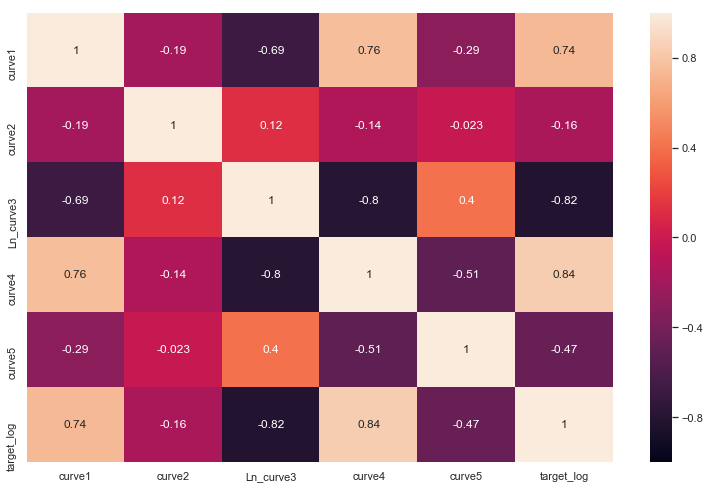

In [232]:
#View data relationship with differentials in cleaned data so far
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(logs_pair.corr(),annot=True,vmin=-1, vmax=1)

In [249]:
logs_cln3.head()

,Observation_Num,UWI_PROXY,depth,curve1,curve2,curve3,curve4,curve5,target_log,curve1_diff,...,curve5_diff_2nd,Target_diff_2nd,Roll_curve1_diff_2nd,Roll_curve3_diff_2nd,Roll_curve4_diff_2nd,Roll_curve5_diff_2nd,Roll_Target_diff_2nd,Roll20_curve1_diff_2nd,Roll20_curve1,Ln_curve3
0,1,uwi1,7500.0,68.713,0.107,2.021,0.361,2.594,91.291,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.703592
1,2,uwi1,7500.5,69.613,0.158,2.007,0.355,2.579,88.889,0.900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.696641
2,3,uwi1,7501.0,70.963,0.150,2.007,0.350,2.592,70.571,1.350,...,0.028,15.916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.696641
3,4,uwi1,7501.5,72.312,0.150,2.000,0.349,2.592,50.000,1.349,...,0.013,2.253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.693147
4,5,uwi1,7502.0,73.437,0.075,1.993,0.350,2.563,57.658,1.125,...,0.029,28.229,0.050401,0.000049,0.000002,0.00008,168.840019,NaN,NaN,0.689641


In [250]:
#Use standard scaler to scale all independant variables for KNN or Ridge Model
logs_scaled=logs_cln3.copy()
scaler=StandardScaler()
logs_scaled[[ 'curve1','curve2','curve3','curve4','curve5',
             'curve1_diff','curve3_diff','curve4_diff','curve5_diff',
             'curve1_diff_2nd', 'curve3_diff_2nd','curve4_diff_2nd', 
             'curve5_diff_2nd', 'Roll_curve1_diff_2nd','Roll_curve3_diff_2nd', 
             'Roll_curve4_diff_2nd','Roll_curve5_diff_2nd','Roll20_curve1_diff_2nd',
             'Roll20_curve1','Ln_curve3']]=scaler.fit_transform(logs_scaled[['curve1','curve2','curve3','curve4','curve5','curve1_diff','curve3_diff','curve4_diff','curve5_diff','curve1_diff_2nd', 'curve3_diff_2nd','curve4_diff_2nd', 'curve5_diff_2nd', 'Roll_curve1_diff_2nd','Roll_curve3_diff_2nd', 'Roll_curve4_diff_2nd','Roll_curve5_diff_2nd','Roll20_curve1_diff_2nd','Roll20_curve1','Ln_curve3']])
logs_scaled['target_log_scaled']=scaler.fit_transform(logs_scaled[['target_log']])
logs_scaled.head(10)

,Observation_Num,UWI_PROXY,depth,curve1,curve2,curve3,curve4,curve5,target_log,curve1_diff,...,Target_diff_2nd,Roll_curve1_diff_2nd,Roll_curve3_diff_2nd,Roll_curve4_diff_2nd,Roll_curve5_diff_2nd,Roll_Target_diff_2nd,Roll20_curve1_diff_2nd,Roll20_curve1,Ln_curve3,target_log_scaled
0,1,uwi1,7500.0,-0.533030,1.837189,-0.164122,1.265883,0.731061,91.291,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.429628,0.576538
1,2,uwi1,7500.5,-0.506061,3.008803,-0.164246,1.209107,0.563732,88.889,-0.447031,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.434775,0.413424
2,3,uwi1,7501.0,-0.465609,2.825020,-0.164246,1.161794,0.708751,70.571,-0.334313,...,15.916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.434775,-0.830507
3,4,uwi1,7501.5,-0.425186,2.825020,-0.164309,1.152332,0.708751,50.000,-0.334563,...,2.253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.437361,-2.227432
4,5,uwi1,7502.0,-0.391475,1.102059,-0.164371,1.161794,0.385248,57.658,-0.390672,...,28.229,-0.124372,-0.033151,-0.130409,-0.090873,168.840019,NaN,NaN,-0.439957,-1.707397
5,6,uwi1,7502.5,-0.411582,-0.184418,-0.164443,1.171257,0.429869,84.985,-0.504393,...,19.669,-0.118957,-0.033151,-0.129497,-0.091718,116.976315,NaN,NaN,-0.442935,0.148313
6,7,uwi1,7503.0,-0.520025,-0.276309,-0.164505,1.152332,0.507956,93.243,0.234040,...,19.069,-0.110627,-0.033151,-0.130149,-0.070871,89.035032,NaN,NaN,-0.445550,0.709093
7,8,uwi1,7503.5,-0.567130,0.412875,-0.164505,1.133406,0.418714,92.655,-0.278705,...,8.846,-0.110591,-0.033151,-0.129053,-0.073443,102.960104,NaN,NaN,-0.445550,0.669163
8,9,uwi1,7504.0,-0.572883,0.412875,-0.164621,1.123944,0.217919,92.192,-0.624376,...,0.125,-0.115882,-0.033151,-0.131400,-0.070921,118.081034,NaN,NaN,-0.450432,0.637722
9,10,uwi1,7504.5,-0.572793,1.446652,-0.164648,1.180719,0.217919,92.342,-0.671717,...,0.613,-0.115690,-0.033151,-0.120447,-0.079899,90.534074,NaN,NaN,-0.451563,0.647908


In [251]:
logs_cln3.head()

,Observation_Num,UWI_PROXY,depth,curve1,curve2,curve3,curve4,curve5,target_log,curve1_diff,...,curve5_diff_2nd,Target_diff_2nd,Roll_curve1_diff_2nd,Roll_curve3_diff_2nd,Roll_curve4_diff_2nd,Roll_curve5_diff_2nd,Roll_Target_diff_2nd,Roll20_curve1_diff_2nd,Roll20_curve1,Ln_curve3
0,1,uwi1,7500.0,68.713,0.107,2.021,0.361,2.594,91.291,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.703592
1,2,uwi1,7500.5,69.613,0.158,2.007,0.355,2.579,88.889,0.900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.696641
2,3,uwi1,7501.0,70.963,0.150,2.007,0.350,2.592,70.571,1.350,...,0.028,15.916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.696641
3,4,uwi1,7501.5,72.312,0.150,2.000,0.349,2.592,50.000,1.349,...,0.013,2.253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.693147
4,5,uwi1,7502.0,73.437,0.075,1.993,0.350,2.563,57.658,1.125,...,0.029,28.229,0.050401,0.000049,0.000002,0.00008,168.840019,NaN,NaN,0.689641


In [252]:
#Drop NA from Scaled Data for Clustering
logs_scaled_cluster=logs_scaled.dropna(subset=['curve1','curve3','Ln_curve3','curve4','curve5','target_log','curve1_diff','curve3_diff','curve4_diff','curve5_diff','Target_diff','curve1_diff_2nd','curve3_diff_2nd','curve4_diff_2nd','curve5_diff_2nd','Target_diff_2nd','Roll20_curve1','Roll20_curve1_diff_2nd','target_log_scaled'])

In [253]:
#Create Cluster using Kmeans. Used 7 as the K based on clustering optimization from clustering notebook
from sklearn.cluster import KMeans
feature_cols=['curve1', 'Ln_curve3','curve4','curve5','target_log_scaled']
X=logs_scaled_cluster[feature_cols]
km = KMeans(n_clusters=5, random_state=1)
km.fit(X)
logs_scaled_cluster['Cluster']=km.labels_

C:\Users\mhurth\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [254]:
colors = np.array(['red', 'green', 'blue', 'yellow','brown','black','purple'])
feature_col=['curve1','Ln_curve3','curve4','curve5','target_log']
X=logs_scaled_cluster[feature_col]
#pd.plotting.scatter_matrix(X,c=colors[logs_scaled_cluster.Cluster], figsize=(15,10), s=100)

In [255]:
dummies=pd.get_dummies(logs_scaled_cluster['Cluster'],prefix='cluster')
logs_scaled_cluster=pd.concat([logs_scaled_cluster,dummies],axis=1)
list(dummies)

['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']

In [257]:
logs_scaled.head(5)

,Observation_Num,UWI_PROXY,depth,curve1,curve2,curve3,curve4,curve5,target_log,curve1_diff,...,Target_diff_2nd,Roll_curve1_diff_2nd,Roll_curve3_diff_2nd,Roll_curve4_diff_2nd,Roll_curve5_diff_2nd,Roll_Target_diff_2nd,Roll20_curve1_diff_2nd,Roll20_curve1,Ln_curve3,target_log_scaled
0,1,uwi1,7500.0,-0.533030,1.837189,-0.164122,1.265883,0.731061,91.291,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.429628,0.576538
1,2,uwi1,7500.5,-0.506061,3.008803,-0.164246,1.209107,0.563732,88.889,-0.447031,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.434775,0.413424
2,3,uwi1,7501.0,-0.465609,2.825020,-0.164246,1.161794,0.708751,70.571,-0.334313,...,15.916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.434775,-0.830507
3,4,uwi1,7501.5,-0.425186,2.825020,-0.164309,1.152332,0.708751,50.000,-0.334563,...,2.253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.437361,-2.227432
4,5,uwi1,7502.0,-0.391475,1.102059,-0.164371,1.161794,0.385248,57.658,-0.390672,...,28.229,-0.124372,-0.033151,-0.130409,-0.090873,168.840019,NaN,NaN,-0.439957,-1.707397


In [258]:
logs_scaled2 = pd.merge(logs_scaled,logs_scaled_cluster[['Observation_Num','Cluster','cluster_0','cluster_1','cluster_2','cluster_3','cluster_4']], how = 'outer', on = ['Observation_Num'])
list(logs_scaled2)
logs_scaled2.head(100)

,Observation_Num,UWI_PROXY,depth,curve1,curve2,curve3,curve4,curve5,target_log,curve1_diff,...,Roll20_curve1_diff_2nd,Roll20_curve1,Ln_curve3,target_log_scaled,Cluster,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
0,1,uwi1,7500.0,-0.533030,1.837189,-0.164122,1.265883,0.731061,91.291,NaN,...,NaN,NaN,-0.429628,0.576538,NaN,NaN,NaN,NaN,NaN,NaN
1,2,uwi1,7500.5,-0.506061,3.008803,-0.164246,1.209107,0.563732,88.889,-0.447031,...,NaN,NaN,-0.434775,0.413424,NaN,NaN,NaN,NaN,NaN,NaN
2,3,uwi1,7501.0,-0.465609,2.825020,-0.164246,1.161794,0.708751,70.571,-0.334313,...,NaN,NaN,-0.434775,-0.830507,NaN,NaN,NaN,NaN,NaN,NaN
3,4,uwi1,7501.5,-0.425186,2.825020,-0.164309,1.152332,0.708751,50.000,-0.334563,...,NaN,NaN,-0.437361,-2.227432,NaN,NaN,NaN,NaN,NaN,NaN
4,5,uwi1,7502.0,-0.391475,1.102059,-0.164371,1.161794,0.385248,57.658,-0.390672,...,NaN,NaN,-0.439957,-1.707397,NaN,NaN,NaN,NaN,NaN,NaN
5,6,uwi1,7502.5,-0.411582,-0.184418,-0.164443,1.171257,0.429869,84.985,-0.504393,...,NaN,NaN,-0.442935,0.148313,NaN,NaN,NaN,NaN,NaN,NaN
6,7,uwi1,7503.0,-0.520025,-0.276309,-0.164505,1.152332,0.507956,93.243,0.234040,...,NaN,NaN,-0.445550,0.709093,NaN,NaN,NaN,NaN,NaN,NaN
7,8,uwi1,7503.5,-0.567130,0.412875,-0.164505,1.133406,0.418714,92.655,-0.278705,...,NaN,NaN,-0.445550,0.669163,NaN,NaN,NaN,NaN,NaN,NaN
8,9,uwi1,7504.0,-0.572883,0.412875,-0.164621,1.123944,0.217919,92.192,-0.624376,...,NaN,NaN,-0.450432,0.637722,NaN,NaN,NaN,NaN,NaN,NaN
9,10,uwi1,7504.5,-0.572793,1.446652,-0.164648,1.180719,0.217919,92.342,-0.671717,...,NaN,NaN,-0.451563,0.647908,NaN,NaN,NaN,NaN,NaN,NaN


In [259]:
logs_cln4 = pd.merge(logs_cln3,logs_scaled_cluster[['Observation_Num','Cluster','cluster_0','cluster_1','cluster_2','cluster_3','cluster_4']], how = 'outer', on = ['Observation_Num'])
logs_cln4['Cluster'] = logs_cln4.Cluster.astype(int, errors='ignore')
list(logs_cln4)

['Observation_Num',
 'UWI_PROXY',
 'depth',
 'curve1',
 'curve2',
 'curve3',
 'curve4',
 'curve5',
 'target_log',
 'curve1_diff',
 'curve3_diff',
 'curve4_diff',
 'curve5_diff',
 'Target_diff',
 'curve1_diff_2nd',
 'curve3_diff_2nd',
 'curve4_diff_2nd',
 'curve5_diff_2nd',
 'Target_diff_2nd',
 'Roll_curve1_diff_2nd',
 'Roll_curve3_diff_2nd',
 'Roll_curve4_diff_2nd',
 'Roll_curve5_diff_2nd',
 'Roll_Target_diff_2nd',
 'Roll20_curve1_diff_2nd',
 'Roll20_curve1',
 'Ln_curve3',
 'Cluster',
 'cluster_0',
 'cluster_1',
 'cluster_2',
 'cluster_3',
 'cluster_4']

In [260]:
logs_cln4.head(100)

,Observation_Num,UWI_PROXY,depth,curve1,curve2,curve3,curve4,curve5,target_log,curve1_diff,...,Roll_Target_diff_2nd,Roll20_curve1_diff_2nd,Roll20_curve1,Ln_curve3,Cluster,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
0,1,uwi1,7500.0,68.713,0.107,2.021,0.361,2.594,91.291,NaN,...,NaN,NaN,NaN,0.703592,NaN,NaN,NaN,NaN,NaN,NaN
1,2,uwi1,7500.5,69.613,0.158,2.007,0.355,2.579,88.889,0.900,...,NaN,NaN,NaN,0.696641,NaN,NaN,NaN,NaN,NaN,NaN
2,3,uwi1,7501.0,70.963,0.150,2.007,0.350,2.592,70.571,1.350,...,NaN,NaN,NaN,0.696641,NaN,NaN,NaN,NaN,NaN,NaN
3,4,uwi1,7501.5,72.312,0.150,2.000,0.349,2.592,50.000,1.349,...,NaN,NaN,NaN,0.693147,NaN,NaN,NaN,NaN,NaN,NaN
4,5,uwi1,7502.0,73.437,0.075,1.993,0.350,2.563,57.658,1.125,...,168.840019,NaN,NaN,0.689641,NaN,NaN,NaN,NaN,NaN,NaN
5,6,uwi1,7502.5,72.766,0.019,1.985,0.351,2.567,84.985,0.671,...,116.976315,NaN,NaN,0.685619,NaN,NaN,NaN,NaN,NaN,NaN
6,7,uwi1,7503.0,69.147,0.015,1.978,0.349,2.574,93.243,3.619,...,89.035032,NaN,NaN,0.682086,NaN,NaN,NaN,NaN,NaN,NaN
7,8,uwi1,7503.5,67.575,0.045,1.978,0.347,2.566,92.655,1.572,...,102.960104,NaN,NaN,0.682086,NaN,NaN,NaN,NaN,NaN,NaN
8,9,uwi1,7504.0,67.383,0.045,1.965,0.346,2.548,92.192,0.192,...,118.081034,NaN,NaN,0.675492,NaN,NaN,NaN,NaN,NaN,NaN
9,10,uwi1,7504.5,67.386,0.090,1.962,0.352,2.548,92.342,0.003,...,90.534074,NaN,NaN,0.673964,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
logs_cln4.to_csv('Data_Cleaned.csv')

In [262]:
logs_scaled2.to_csv('Scaled_Data.csv')